
This dataset contains information of customers in bank, where you are working as Data Scientist. Through given variables you should predict whether a person makes less than 50K $ in a year.
Note: You should not use all variables. Define which parameters will be useful for you. Dataset Description:
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without- pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th- 8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married- spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house- serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying- US(Guam-USVI-etc.), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El- Salvador, Trinadad & Tobago, Peru, Hong, Holland-Netherlands.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import seaborn as seabornInstance
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df=pd.read_csv('income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.shape

(32561, 15)

In [8]:
df.columns=df.columns.str.strip()
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
df['education-num'].nunique(), df['education'].nunique()

(16, 16)

In [12]:
df1=df['education'].value_counts().reset_index()
df2=df['education-num'].value_counts().reset_index()

In [14]:
df2

,education-num,count
0,9,10501
1,10,7291
2,13,5355
3,14,1723
4,11,1382
5,7,1175
6,12,1067
7,6,933
8,4,646
9,15,576


In [16]:
df_education=pd.merge(df1, df2, how='inner')
df_education = df_education[['education', 'education-num', 'count']]
df_education

,education,education-num,count
0,HS-grad,9,10501
1,Some-college,10,7291
2,Bachelors,13,5355
3,Masters,14,1723
4,Assoc-voc,11,1382
5,11th,7,1175
6,Assoc-acdm,12,1067
7,10th,6,933
8,7th-8th,4,646
9,Prof-school,15,576


In [18]:
# so we can drop column education, and education-num  column stay

In [20]:
df['income'].value_counts().reset_index()  # imbalanced data

,income,count
0,<=50K,24720
1,>50K,7841


In [22]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [24]:
df['education'] = df['education'].str.strip()
df[df['education'] == 'Preschool']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
224,53,Local-gov,140359,Preschool,1,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,35,United-States,<=50K
932,51,Local-gov,241843,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
2884,71,Private,235079,Preschool,1,Widowed,Craft-repair,Unmarried,Black,Male,0,0,10,United-States,<=50K
2946,31,Private,452405,Preschool,1,Never-married,Other-service,Other-relative,White,Female,0,0,35,Mexico,<=50K
3446,33,Private,239781,Preschool,1,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,Mexico,<=50K
3592,39,?,362685,Preschool,1,Widowed,?,Not-in-family,White,Female,0,0,20,El-Salvador,<=50K
4107,52,Private,416129,Preschool,1,Married-civ-spouse,Other-service,Not-in-family,White,Male,0,0,40,El-Salvador,<=50K
6433,27,Private,211032,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,41310,0,24,Mexico,<=50K
6864,54,Private,286989,Preschool,1,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K
7070,30,Private,193598,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [26]:
df[df['age'] < 18]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
209,17,Private,65368,11th,7,Never-married,Sales,Own-child,White,Female,0,0,12,United-States,<=50K
262,17,Private,245918,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,12,United-States,<=50K
271,17,Private,191260,9th,5,Never-married,Other-service,Own-child,White,Male,1055,0,24,United-States,<=50K
335,17,Private,270942,5th-6th,3,Never-married,Other-service,Other-relative,White,Male,0,0,48,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31772,17,?,256173,10th,6,Never-married,?,Own-child,White,Female,0,0,15,United-States,<=50K
31864,17,Private,214787,12th,8,Never-married,Adm-clerical,Own-child,White,Female,0,0,25,United-States,<=50K
31959,17,Private,24090,HS-grad,9,Never-married,Exec-managerial,Own-child,White,Female,0,0,35,United-States,<=50K
32282,17,Private,311907,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,25,United-States,<=50K


In [28]:
# marital-status and relationship have similar informaton, lets drop marital-status, and relationship column stay, 
# because it has less unique units in it, so it will be better for encoding

In [30]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [32]:
df['race'] = df['race'].str.strip()
df['race'] = df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'], 'Others')
df['race'].unique()

array(['White', 'Black', 'Others'], dtype=object)

In [34]:
# made in 'race' column 3 unit ones except 5  for better encoding

In [36]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [38]:
df['workclass'].nunique()

9

In [40]:
df['occupation'].nunique()

15

In [42]:
# think workclass and occupatin nave nearly similar info , deside drop workclass. These factors usually have more influence on income than race or marital-status, 
# that's why analize by using 'occupation' column looks like better decison, it has more unique ones 

In [44]:
df['fnlwgt'].value_counts()

fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: count, Length: 21648, dtype: int64

In [46]:
df['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [27]:
df['native-country'].nunique()

42

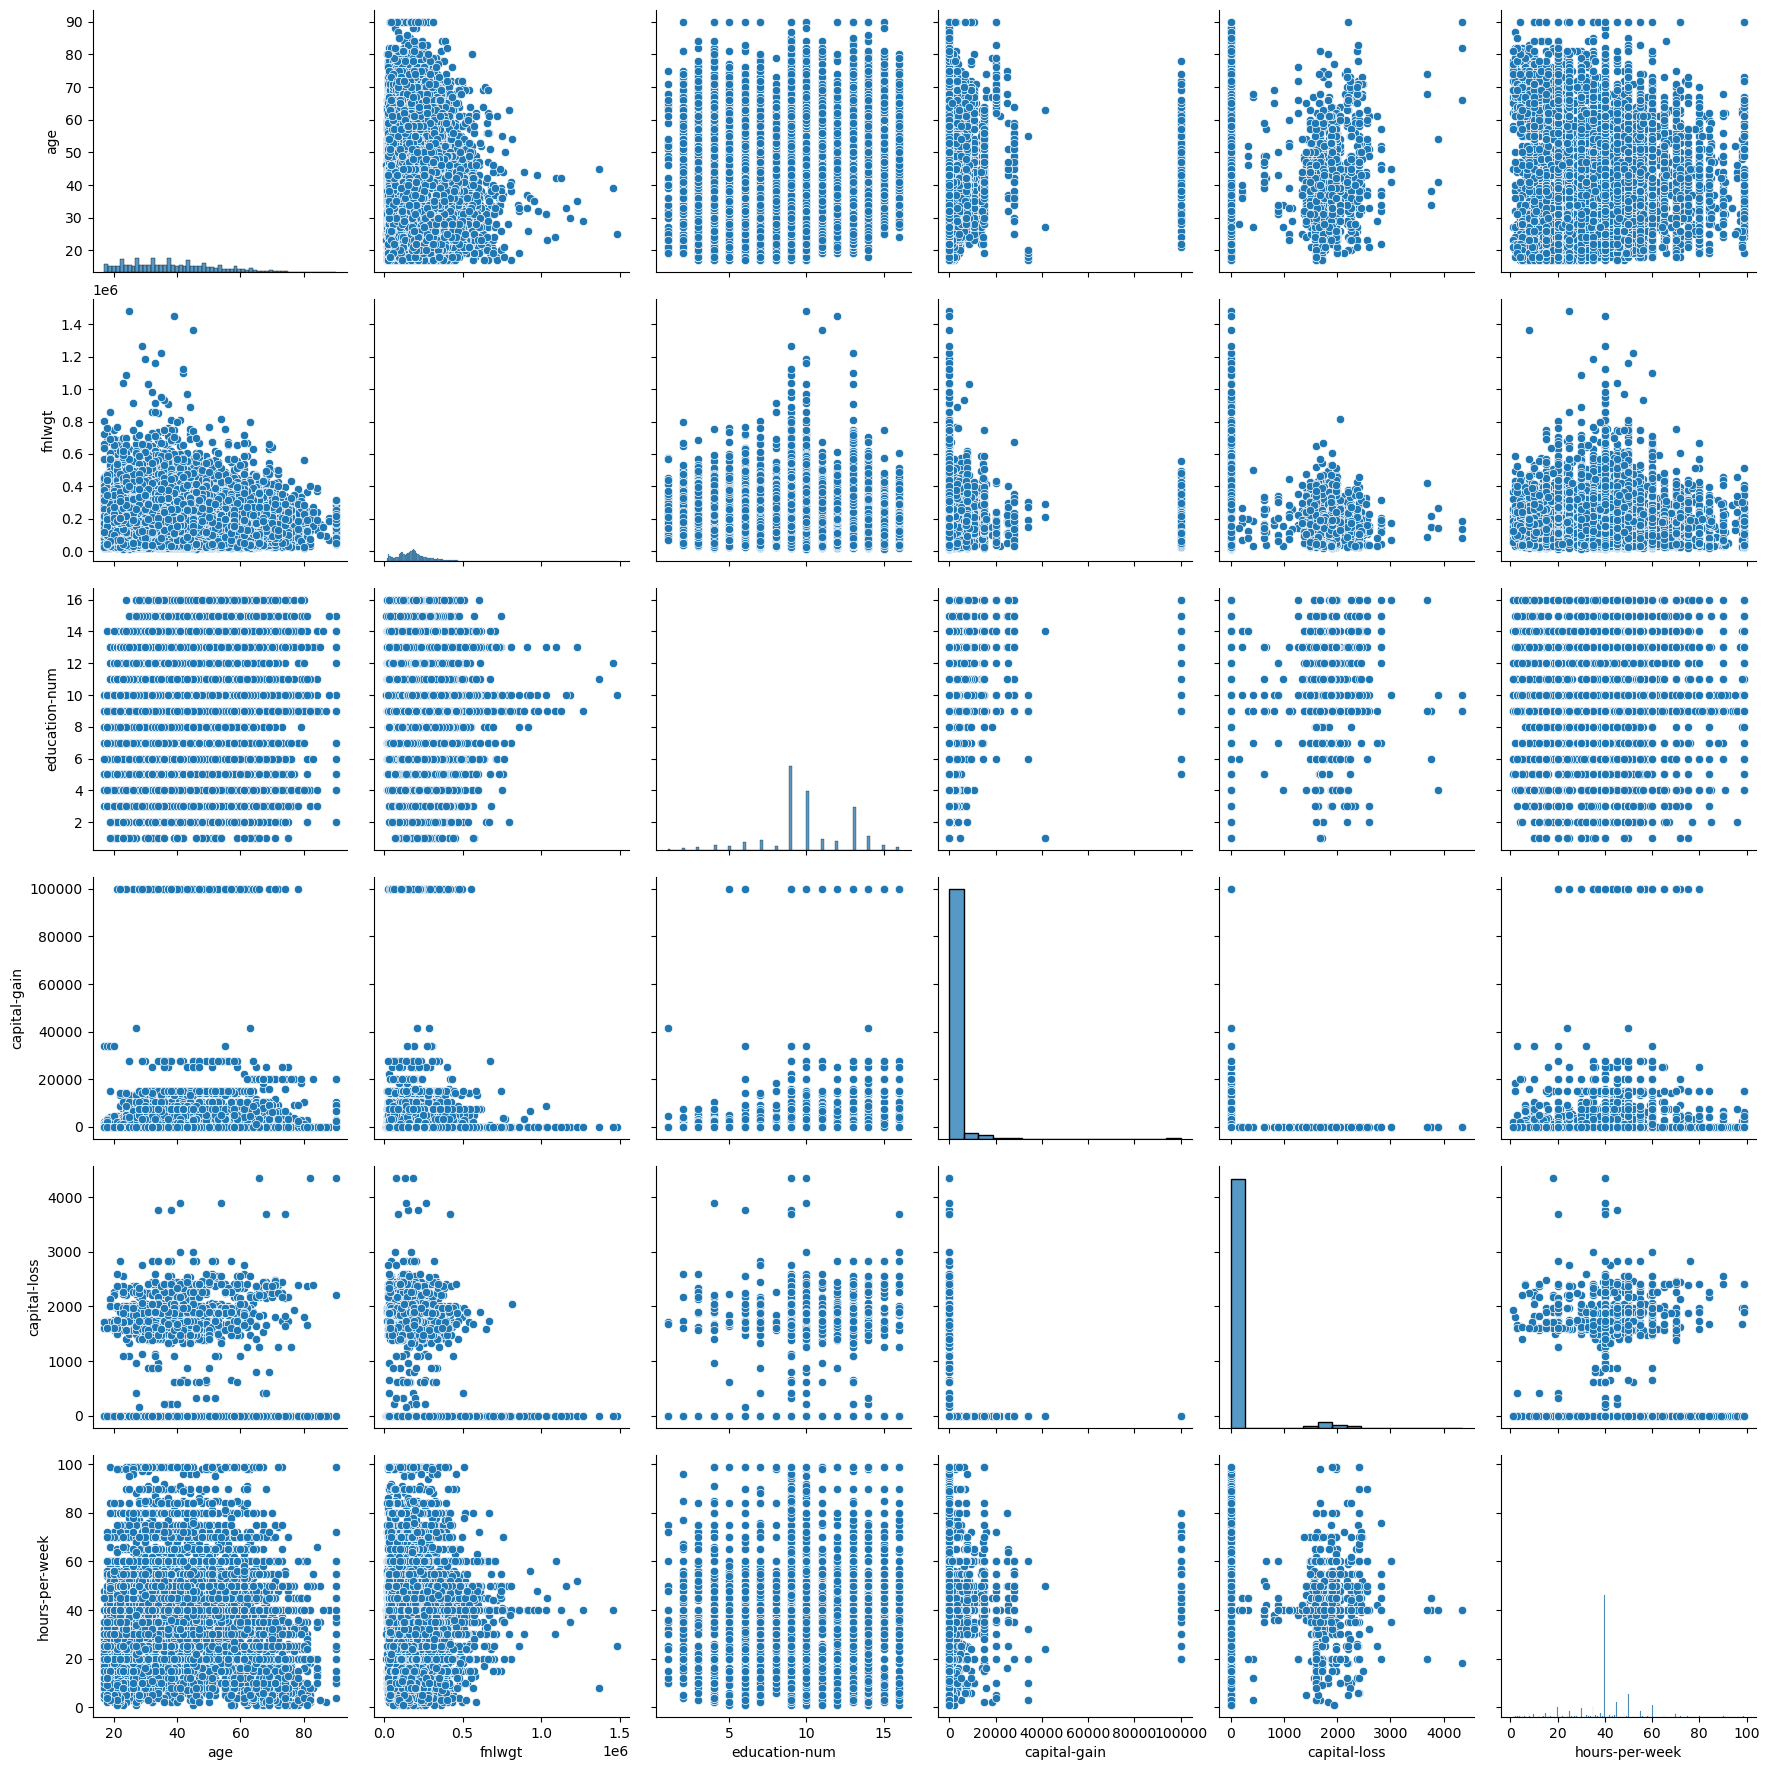

In [28]:
sns.pairplot(df.select_dtypes(exclude='object'), height=3)

  ### 1. Drop 'workclass','education','marital-status','native-country','fnlwgt'
  ### 2. One Hot Encoding : race, income, sex
  ### 3. Target encoding : occupation, relationship

In [48]:
df_copy=df.copy()

In [50]:
df1=df.drop(['workclass','education','marital-status','native-country','fnlwgt',], axis=1)
df1

,age,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,13,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,13,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,9,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,7,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,13,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,12,Tech-support,Wife,White,Female,0,0,38,<=50K
32557,40,9,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
32558,58,9,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
32559,22,9,Adm-clerical,Own-child,White,Male,0,0,20,<=50K


In [52]:
df['race'] = df['race'].str.strip()
df['income'] = df['income'].str.strip()
df['sex'] = df['sex'].str.strip()
df['relationship'] = df['relationship'].str.strip()

In [54]:
df_dummies = pd.get_dummies(df1, columns=['race', 'income', 'sex','relationship'], drop_first=True)
df_dummies

,age,education-num,occupation,capital-gain,capital-loss,hours-per-week,race_Others,race_White,income_ >50K,sex_ Male,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,13,Adm-clerical,2174,0,40,False,True,False,True,True,False,False,False,False
1,50,13,Exec-managerial,0,0,13,False,True,False,True,False,False,False,False,False
2,38,9,Handlers-cleaners,0,0,40,False,True,False,True,True,False,False,False,False
3,53,7,Handlers-cleaners,0,0,40,False,False,False,True,False,False,False,False,False
4,28,13,Prof-specialty,0,0,40,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,Tech-support,0,0,38,False,True,False,False,False,False,False,False,True
32557,40,9,Machine-op-inspct,0,0,40,False,True,True,True,False,False,False,False,False
32558,58,9,Adm-clerical,0,0,40,False,True,False,False,False,False,False,True,False
32559,22,9,Adm-clerical,0,0,20,False,True,False,True,False,False,True,False,False


In [56]:
bool_columns = df_dummies.select_dtypes(include=['bool']).columns
df_dummies[bool_columns] = df_dummies[bool_columns].astype(int)
df_dummies

,age,education-num,occupation,capital-gain,capital-loss,hours-per-week,race_Others,race_White,income_ >50K,sex_ Male,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,13,Adm-clerical,2174,0,40,0,1,0,1,1,0,0,0,0
1,50,13,Exec-managerial,0,0,13,0,1,0,1,0,0,0,0,0
2,38,9,Handlers-cleaners,0,0,40,0,1,0,1,1,0,0,0,0
3,53,7,Handlers-cleaners,0,0,40,0,0,0,1,0,0,0,0,0
4,28,13,Prof-specialty,0,0,40,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,Tech-support,0,0,38,0,1,0,0,0,0,0,0,1
32557,40,9,Machine-op-inspct,0,0,40,0,1,1,1,0,0,0,0,0
32558,58,9,Adm-clerical,0,0,40,0,1,0,0,0,0,0,1,0
32559,22,9,Adm-clerical,0,0,20,0,1,0,1,0,0,1,0,0


In [58]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Train test split

In [61]:
from sklearn.model_selection import train_test_split
y=df_dummies['income_ >50K']
X=df_dummies.drop('income_ >50K',axis=1)

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)
# stratify=y breaks down more balanced layers of information

In [35]:
!pip install category_encoders

In [36]:
# Target encoding, can't use LabelEncoder - it is not make sense,  no ranks of occupations.
# Not use OneHotEncoder - not need  more columns

In [37]:
df3=df_dummies.copy()

In [38]:
from category_encoders import TargetEncoder
encoder=TargetEncoder()
X_encoded_train= encoder.fit_transform(X_train['occupation'],y_train)
X_encoded_test= encoder.transform(X_test['occupation'],y_test)

In [39]:
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
X_train_encoded['occupation_encoded']=X_encoded_train
X_test_encoded['occupation_encoded']=X_encoded_test


In [40]:
X_train_encoded

,age,education-num,occupation,capital-gain,capital-loss,hours-per-week,race_Others,race_White,sex_ Male,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,occupation_encoded
15738,32,13,Exec-managerial,0,0,45,False,True,True,False,False,False,False,False,0.484039
27985,43,14,Exec-managerial,0,0,45,False,True,False,True,False,False,False,False,0.484039
30673,20,9,?,0,0,28,False,True,False,True,False,False,False,False,0.104801
9505,40,10,Transport-moving,6849,0,40,False,True,True,False,False,False,True,False,0.203137
26417,24,13,Prof-specialty,0,0,40,False,True,True,False,False,True,False,False,0.451234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8003,35,9,Sales,0,0,38,False,False,False,False,False,False,True,False,0.265689
20560,39,10,Protective-serv,0,0,30,False,False,False,False,False,False,True,False,0.320076
23650,55,9,Exec-managerial,0,0,55,True,False,True,False,False,False,False,False,0.484039
25301,26,13,Exec-managerial,0,0,55,False,True,True,False,False,False,False,False,0.484039


In [41]:
X_test_encoded

,age,education-num,occupation,capital-gain,capital-loss,hours-per-week,race_Others,race_White,sex_ Male,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,occupation_encoded
9009,31,16,Prof-specialty,0,0,40,False,True,True,False,False,True,False,False,0.451234
25134,20,10,?,0,0,40,False,True,True,False,False,True,False,False,0.104801
16682,78,13,Exec-managerial,9386,0,45,False,True,True,False,False,False,False,False,0.484039
27044,32,13,Craft-repair,0,0,44,False,True,True,False,False,False,False,False,0.225826
3302,61,9,Adm-clerical,0,0,3,False,True,True,False,False,False,False,False,0.130125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11814,42,13,Farming-fishing,0,0,60,False,True,True,False,False,False,False,False,0.118837
27934,34,10,Transport-moving,0,2179,40,False,False,True,False,False,False,False,False,0.203137
6890,39,15,Prof-specialty,0,0,45,False,True,True,False,False,False,False,False,0.451234
32529,29,9,Sales,0,0,35,False,True,False,False,False,False,True,False,0.265689


In [42]:
X_train2=X_train_encoded.drop('occupation',axis=1)
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26048 entries, 15738 to 5800
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           26048 non-null  int64  
 1   education-num                 26048 non-null  int64  
 2   capital-gain                  26048 non-null  int64  
 3   capital-loss                  26048 non-null  int64  
 4   hours-per-week                26048 non-null  int64  
 5   race_Others                   26048 non-null  bool   
 6   race_White                    26048 non-null  bool   
 7   sex_ Male                     26048 non-null  bool   
 8   relationship_ Not-in-family   26048 non-null  bool   
 9   relationship_ Other-relative  26048 non-null  bool   
 10  relationship_ Own-child       26048 non-null  bool   
 11  relationship_ Unmarried       26048 non-null  bool   
 12  relationship_ Wife            26048 non-null  bool   
 13  occ

In [43]:
X_test2=X_test_encoded.drop('occupation',axis=1)
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6513 entries, 9009 to 18518
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           6513 non-null   int64  
 1   education-num                 6513 non-null   int64  
 2   capital-gain                  6513 non-null   int64  
 3   capital-loss                  6513 non-null   int64  
 4   hours-per-week                6513 non-null   int64  
 5   race_Others                   6513 non-null   bool   
 6   race_White                    6513 non-null   bool   
 7   sex_ Male                     6513 non-null   bool   
 8   relationship_ Not-in-family   6513 non-null   bool   
 9   relationship_ Other-relative  6513 non-null   bool   
 10  relationship_ Own-child       6513 non-null   bool   
 11  relationship_ Unmarried       6513 non-null   bool   
 12  relationship_ Wife            6513 non-null   bool   
 13  occu

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier (n_estimators=40, criterion='entropy', random_state=42)
RF_model=classifier.fit(X_train2, y_train)
y_pred_RF=RF_model.predict(X_test2)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score, precision_score, roc_auc_score
cm_RF=confusion_matrix(y_test,y_pred_RF)
print('Confusion Matrix\n\n', cm_RF)

print(accuracy_score(y_test, y_pred_RF))
print(precision_score(y_test, y_pred_RF))
print(recall_score(y_test, y_pred_RF))
print(f1_score(y_test, y_pred_RF))
print(roc_auc_score(y_test, y_pred_RF))

Confusion Matrix

 [[4551  394]
 [ 590  978]]
0.8489175495163519
0.7128279883381924
0.6237244897959183
0.6653061224489796
0.7720240244732878


In [46]:
from sklearn.model_selection import cross_validate
accuracies= cross_validate( estimator = RF_model, X=X_train2, y=y_train, cv=5, scoring=['f1', 'roc_auc', 'recall'])
accuracies

{'fit_time': array([0.57979608, 0.56818414, 0.56742811, 0.57980609, 0.56756878]),
 'score_time': array([0.09894013, 0.09252   , 0.09419394, 0.08913088, 0.09007597]),
 'test_f1': array([0.62958172, 0.65281899, 0.66469844, 0.63947939, 0.65434691]),
 'test_roc_auc': array([0.8819055 , 0.88845498, 0.89146484, 0.87717262, 0.88190246]),
 'test_recall': array([0.58167331, 0.61354582, 0.62788845, 0.5877193 , 0.62121212])}

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression as LogReg
classifier=LogReg (random_state=42)
logistic_model=classifier.fit(X_train2,y_train)
y_pred_logistic=logistic_model.predict(X_test2)
y_pred_logistic
# for p>0,5 1 , p<0,5 0

array([False, False,  True, ...,  True, False,  True])

In [48]:
y_pred_logistic_proba=logistic_model.predict_proba(X_test2)[:,1]
y_pred_logistic_proba

array([0.12156046, 0.03516378, 0.95925806, ..., 0.62738275, 0.04092027,
       0.51758682])

In [91]:
cm_logistic=confusion_matrix(y_test,y_pred_logistic)
print('Confusion Matrix\n\n', cm_logistic)

print(accuracy_score(y_test, y_pred_logistic))
print(precision_score(y_test, y_pred_logistic))
print(recall_score(y_test, y_pred_logistic))
print(f1_score(y_test, y_pred_logistic))
print(roc_auc_score(y_test, y_pred_logistic))

Confusion Matrix

 [[4552  393]
 [ 708  860]]
0.8309534776600644
0.6863527533918595
0.548469387755102
0.6097128677773839
0.73449758568746


# KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=7, metric='euclidean')
KNN_model=classifier.fit(X_train2, y_train)
y_pred_KNN=KNN_model.predict(X_test2)

In [94]:
cm_KNN=confusion_matrix(y_test,y_pred_KNN)
print('Confusion Matrix\n\n', cm_KNN)

print(accuracy_score(y_test, y_pred_KNN))
print(precision_score(y_test, y_pred_KNN))
print(recall_score(y_test, y_pred_KNN))
print(f1_score(y_test, y_pred_KNN))
print(roc_auc_score(y_test, y_pred_KNN))

Confusion Matrix

 [[4500  445]
 [ 575  993]]
0.8433901427913404
0.6905424200278164
0.6332908163265306
0.6606786427145709
0.7716504637749942


In [95]:
from sklearn.model_selection import cross_validate
accuracies= cross_validate( estimator = KNN_model, X=X_train2, y=y_train, cv=4, scoring=['f1', 'roc_auc', 'recall'])
accuracies

{'fit_time': array([0.0177958 , 0.01078391, 0.01106811, 0.01037002]),
 'score_time': array([0.70888805, 0.68327689, 0.6673789 , 0.68046331]),
 'test_f1': array([0.64776221, 0.66355763, 0.65195587, 0.64741437]),
 'test_roc_auc': array([0.87578671, 0.87921055, 0.87596611, 0.87293104]),
 'test_recall': array([0.6042065 , 0.63520408, 0.62181122, 0.61479592])}

In [ ]:
# From these models KNN shows better results